In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import warnings

warnings.filterwarnings("ignore")

data = pd.read_csv("LoanApprovalPrediction.csv") 

print('Shape',data.shape)
print('Info\n',data.info())
print(data.isnull().sum())
print('Description\n',data.describe())

data.drop(['Loan_ID'],axis=1,inplace=True)

Shape (598, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            598 non-null    object 
 1   Gender             598 non-null    object 
 2   Married            598 non-null    object 
 3   Dependents         586 non-null    float64
 4   Education          598 non-null    object 
 5   Self_Employed      598 non-null    object 
 6   ApplicantIncome    598 non-null    int64  
 7   CoapplicantIncome  598 non-null    float64
 8   LoanAmount         577 non-null    float64
 9   Loan_Amount_Term   584 non-null    float64
 10  Credit_History     549 non-null    float64
 11  Property_Area      598 non-null    object 
 12  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(7)
memory usage: 60.9+ KB
Info
 None
Loan_ID               0
Gender                0
Married               0
Dependents   

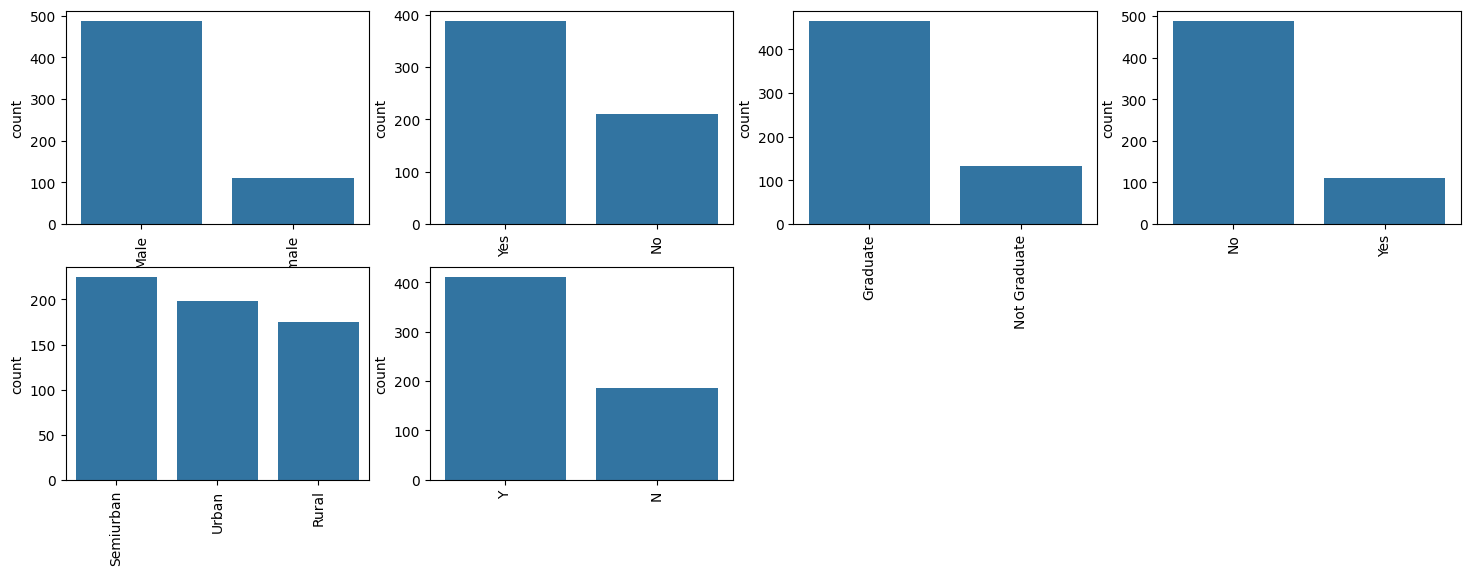

In [2]:
obj = (data.dtypes == 'object') 
object_cols = list(obj[obj].index) 
plt.figure(figsize=(18,36)) 
index = 1
  
for col in object_cols: 
  y = data[col].value_counts() 
  plt.subplot(11,4,index) 
  plt.xticks(rotation=90) 
  sns.barplot(x=list(y.index), y=y) 
  index +=1

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    object 
 1   Married            598 non-null    object 
 2   Dependents         586 non-null    float64
 3   Education          598 non-null    object 
 4   Self_Employed      598 non-null    object 
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         577 non-null    float64
 8   Loan_Amount_Term   584 non-null    float64
 9   Credit_History     549 non-null    float64
 10  Property_Area      598 non-null    object 
 11  Loan_Status        598 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 56.2+ KB
None


In [4]:
label_encoder = preprocessing.LabelEncoder() 
obj = (data.dtypes == 'object') 
for col in list(obj[obj].index): 
  data[col] = label_encoder.fit_transform(data[col])

mode_value = data['Credit_History'].mode()[0]
data['Credit_History'] = data['Credit_History'].fillna(mode_value)

for col in data.columns: 
  data[col] = data[col].fillna(data[col].mean())
print(data.isnull().sum())
print(data.info())


Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             598 non-null    int32  
 1   Married            598 non-null    int32  
 2   Dependents         598 non-null    float64
 3   Education          598 non-null    int32  
 4   Self_Employed      598 non-null    int32  
 5   ApplicantIncome    598 non-null    int64  
 6   CoapplicantIncome  598 non-null    float64
 7   LoanAmount         598 non-null    float64
 8   Loan_Amount_Term   598 non-null    float64
 9   Credit_History     598 non-null    float64
 10  Property_Area      598 no

<Axes: >

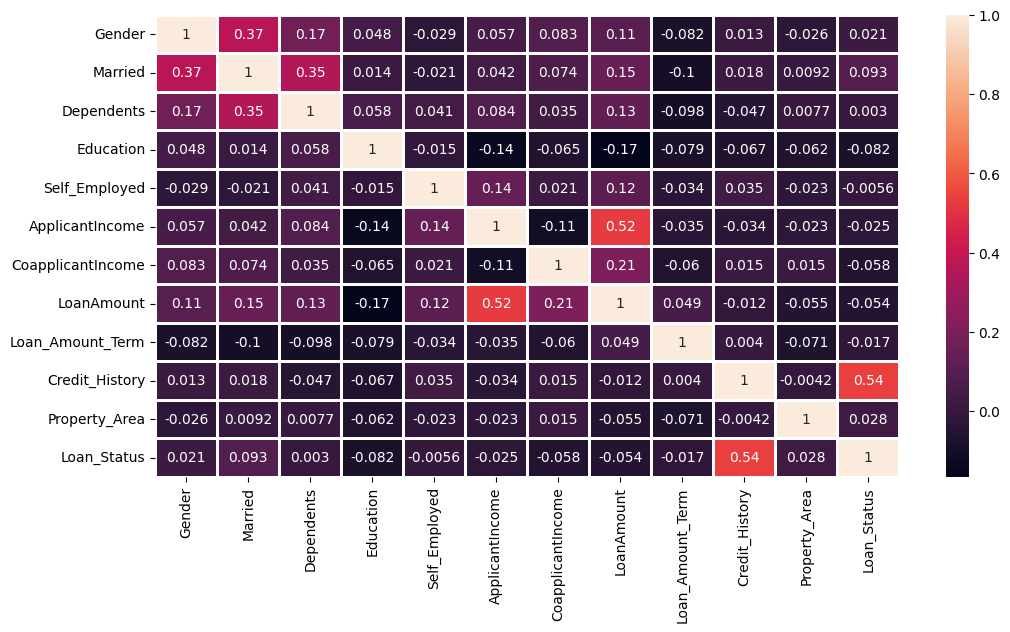

In [5]:
plt.figure(figsize=(12,6)) 
  
sns.heatmap(data.corr(), linewidths=2,annot=True)

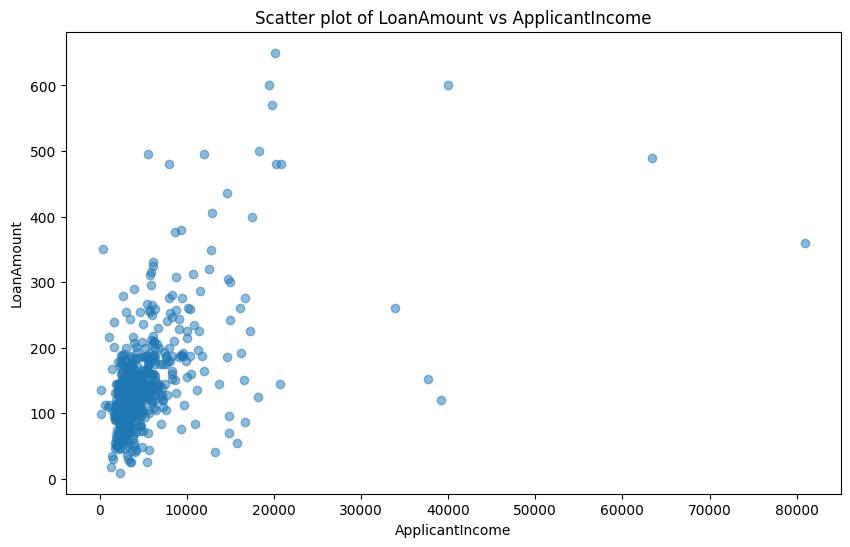

In [6]:
plt.figure(figsize=(10, 6))
plt.scatter(data['ApplicantIncome'], data['LoanAmount'], alpha=0.5)
plt.title('Scatter plot of LoanAmount vs ApplicantIncome')
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.show()


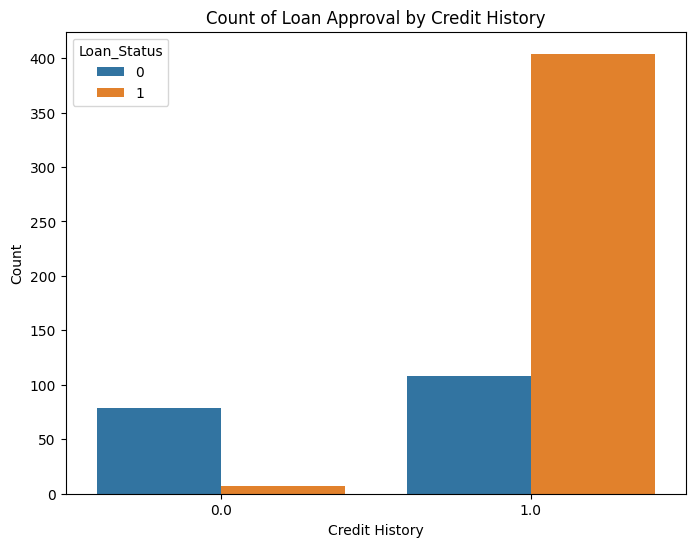

In [7]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Credit_History', hue='Loan_Status', data=data)
plt.title('Count of Loan Approval by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()


(598, 11) (598,)
(358, 11) (240, 11) (358,) (240,)
Confusion Matrix:
 [[ 35  38]
 [  9 158]]


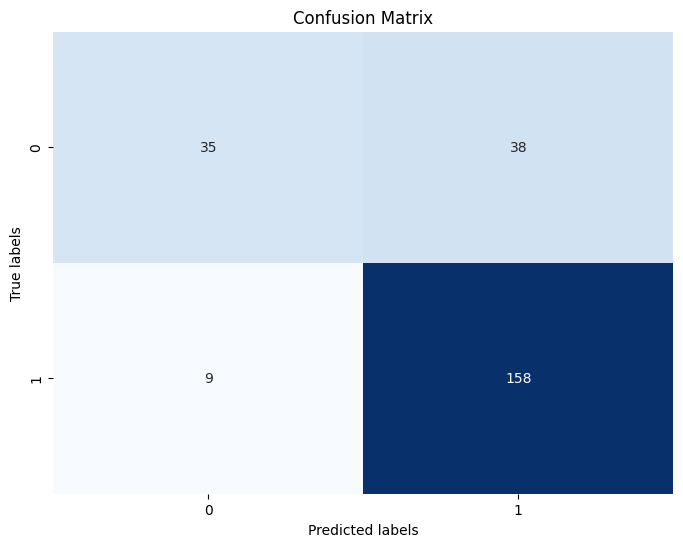

Evaluation Metrics for Training Set:
Accuracy: 80.16759776536313
Precision: 78.92976588628763
Recall: 96.72131147540983
F1 Score: 86.92449355432782

Evaluation Metrics for Testing Set:
Accuracy: 80.41666666666667
Precision: 80.61224489795919
Recall: 94.61077844311377
F1 Score: 87.05234159779614


In [8]:
X = data.drop(['Loan_Status'],axis=1) 
Y = data['Loan_Status'] 
print(X.shape,Y.shape )

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4, random_state=1) 
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

lc = LogisticRegression() 
lc.fit(X_train, Y_train) 

Y_train_pred = lc.predict(X_train) 
Y_test_pred = lc.predict(X_test) 

conf_matrix = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy_test = accuracy_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train,Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)

print("Evaluation Metrics for Training Set:")
print("Accuracy:", 100*accuracy_train)
print("Precision:", 100*precision_train)
print("Recall:", 100*recall_train)
print("F1 Score:", 100*f1_train)
print()

print("Evaluation Metrics for Testing Set:")
print("Accuracy:", 100*accuracy_test)
print("Precision:", 100*precision_test)
print("Recall:", 100*recall_test)
print("F1 Score:", 100*f1_test)


Confusion Matrix:
 [[ 19  54]
 [ 33 134]]


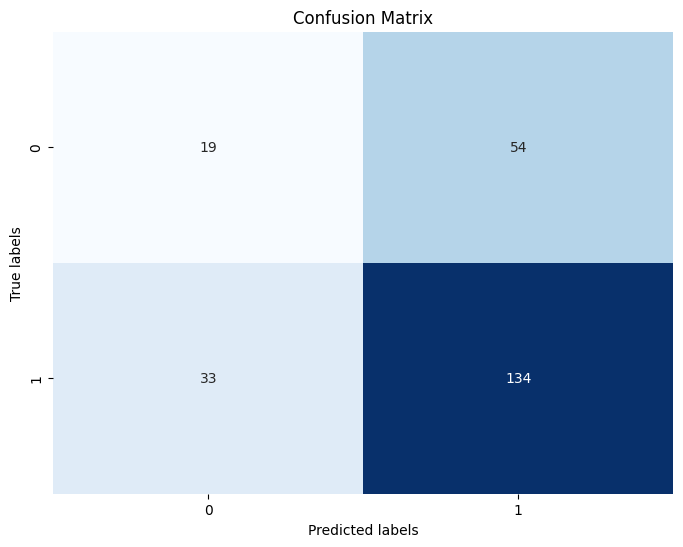

Evaluation Metrics for Training Set:
Accuracy: 78.49162011173185
Precision: 79.7153024911032
Recall: 91.80327868852459
F1 Score: 85.33333333333333

Evaluation Metrics for Testing Set:
Accuracy: 63.74999999999999
Precision: 71.27659574468085
Recall: 80.23952095808383
F1 Score: 75.49295774647888


In [9]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

Y_train_pred = knn.predict(X_train)
Y_test_pred = knn.predict(X_test)

cm = confusion_matrix(Y_test, Y_test_pred)
print("Confusion Matrix:\n", cm)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

accuracy_test = accuracy_score(Y_test, Y_test_pred)
recall_test = recall_score(Y_test, Y_test_pred)
precision_test = precision_score(Y_test, Y_test_pred)
f1_test = f1_score(Y_test, Y_test_pred)

accuracy_train = accuracy_score(Y_train, Y_train_pred)
precision_train = precision_score(Y_train, Y_train_pred)
recall_train = recall_score(Y_train,Y_train_pred)
f1_train = f1_score(Y_train, Y_train_pred)

print("Evaluation Metrics for Training Set:")
print("Accuracy:", 100*accuracy_train)
print("Precision:", 100*precision_train)
print("Recall:", 100*recall_train)
print("F1 Score:", 100*f1_train)
print()

print("Evaluation Metrics for Testing Set:")
print("Accuracy:", 100*accuracy_test)
print("Precision:", 100*precision_test)
print("Recall:", 100*recall_test)
print("F1 Score:", 100*f1_test)